In [1]:
import pandas as pd
import pickle
df = pickle.load(open('splitbytime/time_210312_to_210411.p','rb'))

In [2]:
import pyproj
epsg3857 = pyproj.Proj(init='epsg:3857') #EPSG:3857 -- WGS84 Web Mercator [used by websites]
wgs84 = pyproj.Proj(init='EPSG:4326') #WGS 84 [used by GPS satellite system]
df['x'],df['y'] = pyproj.transform(wgs84,epsg3857,df['longitude'],df['latitude'])

/home/mike/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/mike/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/home/mike/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making

In [3]:
centre = pyproj.transform(wgs84,epsg3857,0.3215, 32.576)

<ipython-input-3-f552caa22c99>:1: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  centre = pyproj.transform(wgs84,epsg3857,0.3215, 32.576)


(2839159.3436576044, 4839159.343657604)

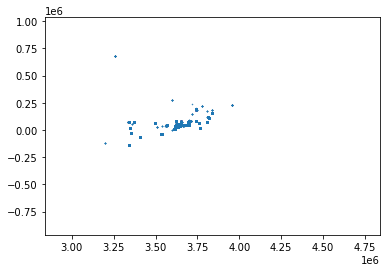

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['x'],df['y'],'.',markersize=1)
boxwidth = 1e6 #200km across
plt.ylim([centre[0]-boxwidth,centre[0]+boxwidth])
plt.xlim([centre[1]-boxwidth,centre[1]+boxwidth])

In [5]:
import datetime as dt
import numpy as np

kampala_df = df[(df['x']>centre[1]-boxwidth) & (df['x']<centre[1]+boxwidth) & (df['y']>centre[0]-boxwidth) & (df['y']<centre[0]+boxwidth)]
print(len(np.unique(kampala_df['channel_id'])))

kampala_df = kampala_df.dropna()
kampala_df['t'] =(kampala_df['created_at']-dt.datetime(2020,1,1)).dt.total_seconds()

#need to average over 10 min intervals (within sensors)
dfs = []
for cid in np.unique(kampala_df['channel_id']):
    print(".",end="")
    channel_df = kampala_df[kampala_df['channel_id']==cid]
    dfs.append(channel_df.resample('10T',on='created_at').mean().dropna()) #10 minute averages
kampala_df = pd.concat(dfs)

70
....................................................................

In [6]:
#temp = kampala_df[kampala_df['channel_id']==912221]
#plt.plot(np.diff(temp.sort_values('t')['t']),'.')
#plt.ylim([0,1000])

In [7]:
kampala_df

,channel_id,entry_id,pm2_5,pm10,s2_pm2_5,s2_pm10,latitude,longitude,voltage,altitude,wind,no_sats,hdope,temperature,humidity,x,y,t
created_at,,,,,,,,,,,,,,,,,,
2021-03-12 06:50:00,672528.0,348081.0,118.930000,124.670000,122.320000,127.930000,-0.265464,30.107008,3.130000,1000000.000000,0.040000,255.000000,4.294967e+09,23.000000,28.000000,3.351497e+06,-29551.423033,3.769540e+07
2021-03-12 07:10:00,672528.0,348084.0,82.268000,86.208000,82.812000,87.678000,-0.265472,30.107018,3.374000,1315.760000,0.020000,9.400000,9.280000e+01,23.000000,18.000000,3.351498e+06,-29552.291334,3.769659e+07
2021-03-12 07:20:00,672528.0,348090.0,100.022857,104.510000,99.208571,104.725714,-0.265484,30.107000,3.592857,1317.585714,0.015714,9.571429,8.828571e+01,25.000000,17.285714,3.351496e+06,-29553.681253,3.769710e+07
2021-03-12 07:30:00,672528.0,348097.0,76.594286,82.124286,74.924286,81.538571,-0.265470,30.106986,3.680000,1321.571429,0.010000,9.571429,8.728571e+01,26.428571,16.571429,3.351494e+06,-29552.059151,3.769768e+07
2021-03-12 07:40:00,672528.0,348104.0,56.457143,66.058571,56.205714,66.231429,-0.265456,30.106973,3.700000,1325.314286,0.015714,10.000000,8.928571e+01,27.714286,16.000000,3.351493e+06,-29550.548370,3.769827e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-10 15:50:00,1351543.0,1237.5,40.547500,50.245000,41.871250,52.547500,0.380715,32.576533,3.285000,1207.337500,0.013750,12.000000,7.837500e+01,35.000000,0.000000,3.626403e+06,42381.311672,4.023329e+07
2021-04-10 16:00:00,1351543.0,1245.5,43.627500,54.860000,44.625000,57.247500,0.380709,32.576539,3.253750,1207.500000,0.013750,12.000000,8.150000e+01,35.000000,0.000000,3.626404e+06,42380.671850,4.023389e+07
2021-04-10 16:10:00,1351543.0,1252.0,45.812000,56.540000,47.764000,60.002000,0.380695,32.576583,3.218000,1214.860000,0.014000,12.000000,7.300000e+01,35.000000,0.000000,3.626409e+06,42379.085818,4.023454e+07


In [8]:
X = np.c_[kampala_df['t'].to_numpy(),kampala_df['t'].to_numpy()+90,kampala_df['x'].to_numpy(),kampala_df['y'].to_numpy()]
y = np.mean(kampala_df[['pm2_5','s2_pm2_5']].to_numpy(),1)

X = X[::10000]
y = y[::10000]

In [9]:
#Import Modules

#numpy
import numpy as np
from numpy.random import multivariate_normal #For later example

import pandas as pd

#advectionGP
from advectionGP.models import AdjointAdvectionDiffusionModel as Model #Model module builds basic parts of the PDE problem, combines other classes into full model
from advectionGP.sensors import FixedSensorModel #Builds sensor arrays to generate data for foward model or to generate observations for comparison
from advectionGP.kernels import EQ #Generates exponentiated quadratic kernel approximation
from advectionGP.test import TestKernels #Unit test model

#Plotting tools
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [10]:
sensors = FixedSensorModel(X,1)

In [166]:
k_0 = 0.01 #Diffusion
R=0.1
noiseSD = 0.05 #Observation noise
N_feat=100 # number of features used to approximate ground truth GP
boundary = ([np.min(X[:,0]),centre[1]-boxwidth,centre[0]-boxwidth],[np.max(X[:,1]),centre[1]+boxwidth,centre[0]+boxwidth])
k = EQ(200000, 2.0) # generate EQ kernel arguments are lengthscale and variance
res = [50,30,30] # grid size for time, x and y
wind=np.cos(np.linspace(0,6*np.pi,res[1]))*0.05
u=[]
u.append(np.ones(res)*wind) #x direction wind
u.append(np.ones(res)*0.0) # y direction wind
m = Model(resolution=res,boundary=boundary,N_feat=N_feat,noiseSD=noiseSD,kernel=k,sensormodel=sensors,u=u,k_0=k_0)

dt,dx,dy,dx2,dy2,Nt,Nx,Ny = m.getGridStepSize() # useful numbers!


regress = m.computeModelRegressors() # Compute regressor matrix
meanZ, covZ = m.computeZDistribution(y) # Infers z vector mean and covariance
sourceInfer = m.computeSourceFromPhi(meanZ) # Generates estimated source using inferred distributio

Calculating Adjoints...
17/18 
Calculating Phis...
99/100 


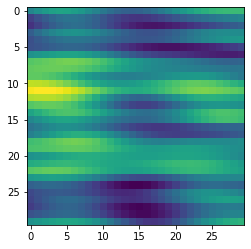

In [167]:
plt.imshow(sourceInfer[25,:,:]) 

In [11]:
channel_df['t']

2       40236398.0
6       40148005.0
70      40196810.0
71      40196890.0
72      40196514.0
           ...    
1320    40139558.0
1321    40140145.0
1322    40139786.0
1323    40139266.0
1324    40139339.0
Name: t, Length: 1256, dtype: float64

In [12]:
kampala_df.index.values

array(['2021-03-12T06:50:00.000000000', '2021-03-12T07:10:00.000000000',
       '2021-03-12T07:20:00.000000000', ...,
       '2021-04-10T16:10:00.000000000', '2021-04-10T16:20:00.000000000',
       '2021-04-10T16:40:00.000000000'], dtype='datetime64[ns]')

In [20]:
len(channel_df)

0

(0.0, 100.0)

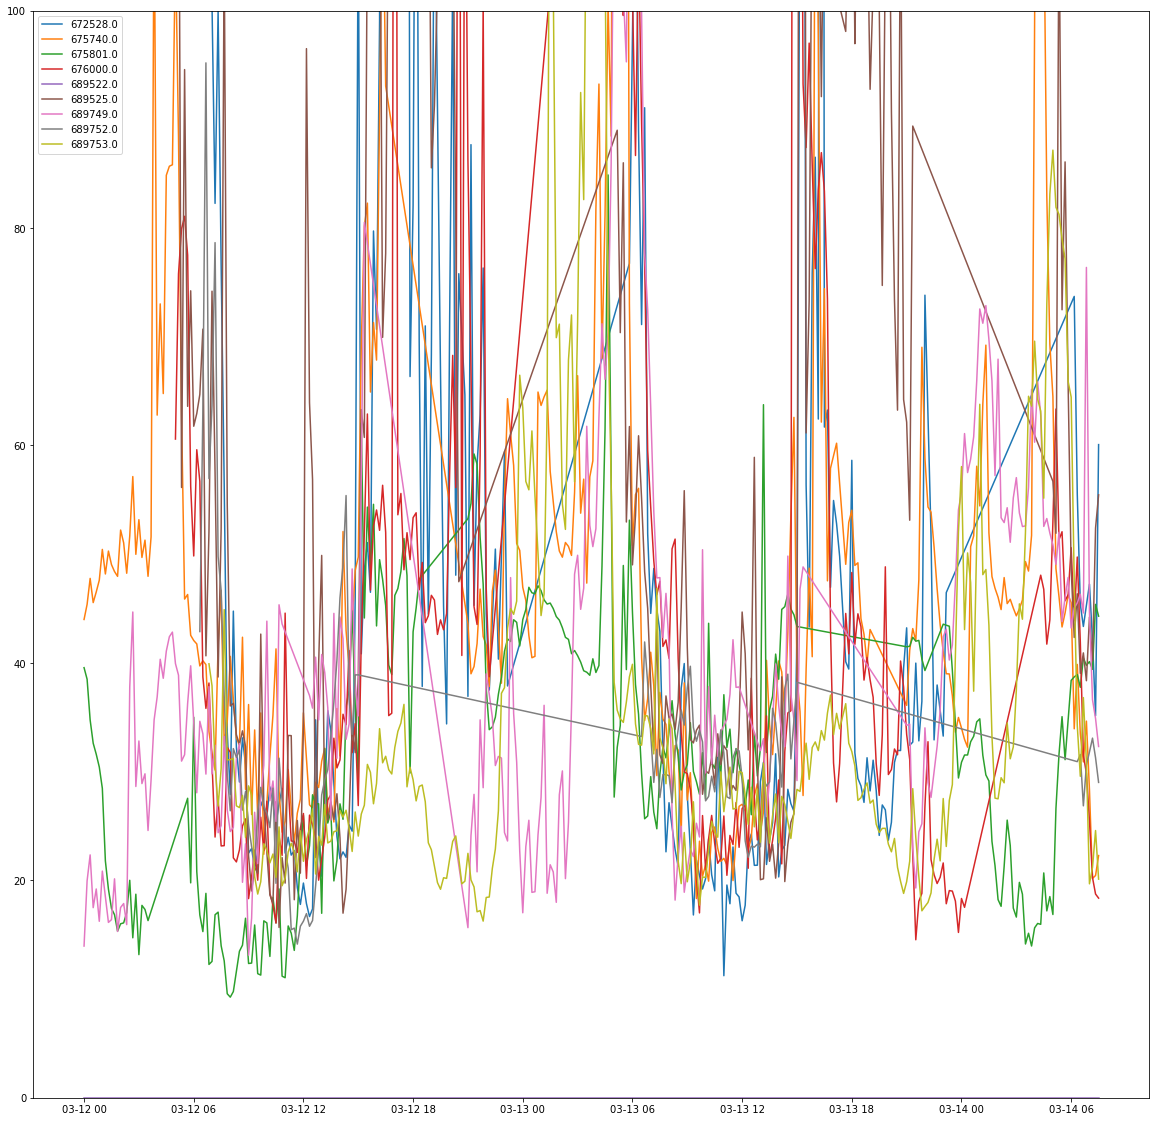

In [25]:
plt.figure(figsize=[20,20])
for cid in np.unique(kampala_df['channel_id'])[:10]:
    channel_df = kampala_df[kampala_df['channel_id']==cid]
    channel_df = channel_df.sort_index() #sort_values('created_at')
    channel_df = channel_df[channel_df['t']<37870814]
    if len(channel_df)==0: 
        continue #no data
    plt.plot(channel_df.index.values,channel_df['pm2_5'],'-',label=cid)
plt.legend()
plt.ylim([0,100])